**STOCK PRICE PREDICTOR**

Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

Taking Input for Company

In [36]:
symbol_input=input(
    "***** Enter stock *****\n \n"
    "Press the corresponding number:\n \n"
    "1 for Apple\n"
    "2 for Microsoft\n"
    "3 for Amazon\n"
    "4 for Alphabet - Google\n"
    "5 for Meta\n"
    "6 for Tesla\n"
    "7 for NVIDIA\n"
    "8 for Berkshire Hathaway\n"
    "9 for JPMorgan Chase\n"
    "10 for Johnson & Johnson\n"
)

Assigning Ticker

In [38]:
tickers={
    "1": "AAPL",
    "2": "MSFT",
    "3": "AMZN",
    "4": "GOOGL",
    "5": "META",
    "6": "TSLA",
    "7": "NVDA",
    "8": "BRK-B",
    "9": "JPM",
    "10": "JNJ"
}

ticker=tickers.get(symbol_input)

if ticker:
    print("You selected ticker:", ticker)
else:
    print("Invalid input.")

You selected ticker: NVDA


Getting the Ticker Data

In [39]:
today=datetime.today().strftime('%Y-%m-%d')

ticker_data=yf.download(ticker, start="2020-01-01", end=today, auto_adjust=True)

closing_prices=ticker_data['Close'].values

[*********************100%***********************]  1 of 1 completed


Data Normalisation

In [40]:
max_price=np.max(closing_prices)
min_price=np.min(closing_prices)

normalised_price=(closing_prices-min_price)/(max_price-min_price)

Creating Data Sequence

In [41]:
def create_sequences(data, window_size=60):
    X=[]
    y=[]
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X, y=create_sequences(normalised_price)

Splitting Data for Training and Testing

In [42]:
split=int(len(X) * 0.8)
X_train=X[:split]
X_test=X[split:]
Y_train=y[:split]
Y_test=y[split:]

Making Prediction

In [43]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1])

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Reshaping Data

In [44]:
last_60_days=normalised_price[-60:].reshape(1, -1)
future_predictions=[]

for _ in range(30):
    next_day=model.predict(last_60_days)[0]
    future_predictions.append(next_day)

    last_60_days=np.append(last_60_days.flatten()[1:], next_day)

    last_60_days=last_60_days.reshape(1, -1)

Predicting Prices

In [45]:
predicted_prices=(np.array(future_predictions)*(max_price-min_price))+min_price

In [46]:
from datetime import timedelta

last_date=ticker_data.index[-1]
future_dates=[last_date+timedelta(days=i+1) for i in range(30)]

Data Visualisation

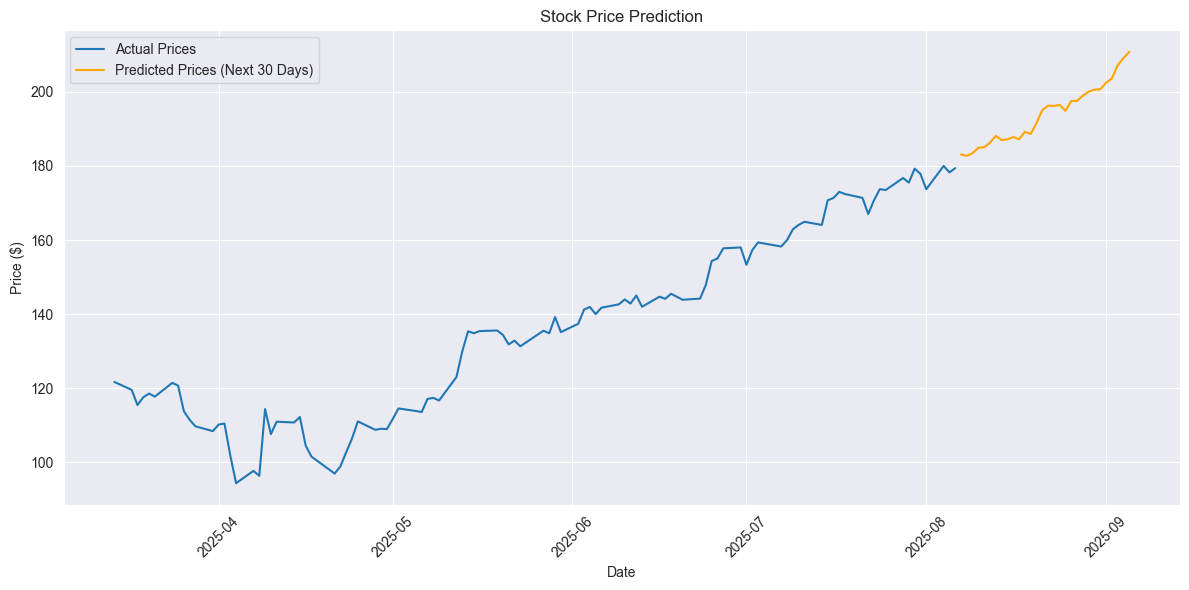

In [47]:
last_100_dates = ticker_data.index[-100:]
last_100_prices = closing_prices[-100:]

plt.figure(figsize=(12, 6))
plt.plot(last_100_dates, last_100_prices, label='Actual Prices')
plt.plot(future_dates, predicted_prices, label='Predicted Prices (Next 30 Days)', color='orange')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Stock Price Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Displaying Data Results

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.0009
Mean Absolute Error (MAE): 0.0222
R² Score: 0.9219


Displaying Data Wise Prices

In [49]:
for date, price in zip(future_dates, predicted_prices):
 print(f"{date.date()}: ${price.item():.2f}")

2025-08-07: $183.09
2025-08-08: $182.74
2025-08-09: $183.50
2025-08-10: $184.94
2025-08-11: $185.07
2025-08-12: $186.31
2025-08-13: $188.14
2025-08-14: $187.01
2025-08-15: $187.19
2025-08-16: $187.84
2025-08-17: $187.21
2025-08-18: $189.22
2025-08-19: $188.64
2025-08-20: $191.57
2025-08-21: $195.09
2025-08-22: $196.28
2025-08-23: $196.23
2025-08-24: $196.50
2025-08-25: $194.89
2025-08-26: $197.54
2025-08-27: $197.57
2025-08-28: $198.99
2025-08-29: $200.07
2025-08-30: $200.63
2025-08-31: $200.71
2025-09-01: $202.45
2025-09-02: $203.63
2025-09-03: $207.20
2025-09-04: $209.15
2025-09-05: $210.82
